Name: Shivraj Ramesh Nalawade

PRN : 202301060008

# **Practical Assignment 4: Classification Models**

Develop classification models (SVM, Decision Trees, KNN, and Naïve Bayes),evaluate performance using relevant metrics(accuracy, precision, recall,F1-score,loss)and summarize the findings of comparative analysistodiscussthesuitabilityofeachalgorithmforvariousclassificationtasks.

# **Step 1: Data Collection & Preparation**

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv("/content/Crop_recommendation.csv")


In [3]:
# Step 2: Display first few rows
print("Sample Data:")
print(data.head())

Sample Data:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [4]:
# Step 3: Basic Information about dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [5]:
# Step 4: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [6]:
# Step 5: Dataset shape and column names
print("\nDataset Shape:", data.shape)
print("Columns:", data.columns.tolist())


Dataset Shape: (2200, 8)
Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [7]:
# Step 6: Statistical Summary
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [8]:
# Step 7: Unique crop labels
print("\nNumber of Unique Crops:", data['label'].nunique())
print("Crop Names:", sorted(data['label'].unique()))


Number of Unique Crops: 22
Crop Names: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


# **Step 2: Model Building**

In [9]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
# Step 3: Separate features and target
X = data.drop('label', axis=1)
y = data['label']

In [11]:
# Step 4: Encode target labels into numeric form
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# **1. Decision Tree Classifier**

In [13]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f" Decision Tree Accuracy: {acc_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=encoder.classes_))


 Decision Tree Accuracy: 0.9795

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.86      0.90      0.88        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.86      0.95      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00 

# **2. Random Forest Classifier**

In [14]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=encoder.classes_))


Random Forest Accuracy: 0.9955

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00  

# **3. Naïve Bayes Classifier**

In [15]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

# Initialize and train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb, target_names=encoder.classes_))


Naive Bayes Accuracy: 0.9955

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00    

# **4. Support Vector Machine (SVM)**

In [16]:
# Support Vector Machine Model

from sklearn.svm import SVC

# Initialize and train
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=encoder.classes_))


SVM Accuracy: 0.9841

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.80      1.00      0.89        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00  

# **5. K-Nearest Neighbors (KNN)**

In [17]:
# K-Nearest Neighbors Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
knn_model = KNeighborsClassifier(n_neighbors=5)   # You can tune n_neighbors as needed
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {acc_knn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, target_names=encoder.classes_))


K-Nearest Neighbors Accuracy: 0.9773

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.78      0.90      0.84        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.95      0.97        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       

# **Step 3: Save the Best Model**

In [28]:
# Step 1: Create a DataFrame to compare all models
model_performance = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM', 'KNN'],
    'Accuracy': [acc_dt, acc_rf, acc_nb, acc_svm, acc_knn]
})

In [29]:
# Step 2: Display comparison table
print("Model Performance Comparison:\n")
print(model_performance)

Model Performance Comparison:

           Model  Accuracy
0  Decision Tree  0.979545
1  Random Forest  0.995455
2    Naive Bayes  0.995455
3            SVM  0.984091
4            KNN  0.977273


/tmp/ipython-input-3928207251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='viridis')


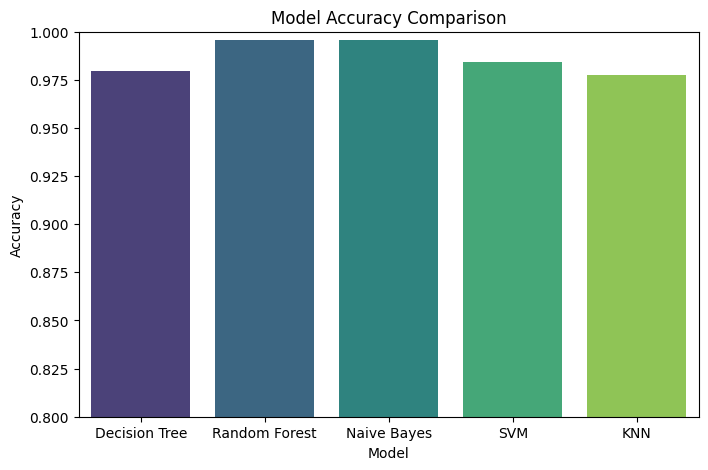

In [30]:
# Step 3: Visualize model performance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()

In [31]:
# Step 4: Identify best model
best_model_name = model_performance.loc[model_performance['Accuracy'].idxmax(), 'Model']
best_accuracy = model_performance['Accuracy'].max()

print(f"\n Best Model: {best_model_name} (Accuracy: {best_accuracy:.4f})")


 Best Model: Random Forest (Accuracy: 0.9955)


In [32]:
import joblib

# Step 1: Save the best model
joblib.dump(rf_model, "Best_Crop_Recommendation_Model.pkl")

['Best_Crop_Recommendation_Model.pkl']

In [33]:
# Step 2: Save the encoder (to decode labels later)
joblib.dump(encoder, "Crop_Label_Encoder.pkl")

['Crop_Label_Encoder.pkl']